In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train_df.shape

(8693, 14)

In [5]:
test_df.shape

(4277, 13)

In [6]:
train_df.isnull().sum().sum()

2324

In [7]:
test_df.isnull().sum().sum()

1117

In [8]:
train_df = train_df.dropna()
train_df.shape

(6606, 14)

In [9]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
train_df.isnull().sum().sum() 

0

In [11]:
test_df = test_df.dropna()
test_df.shape

(3281, 13)

In [12]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [13]:
test_df.isnull().sum().sum()

0

In [14]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [16]:
class_mapping = {True: 1, False: 0}
y = y.map(class_mapping)
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

In [17]:
X.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [18]:
ohe_columns = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]
X = pd.get_dummies(X, columns = ohe_columns)
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_0001_01,PassengerId_0002_01,PassengerId_0003_01,PassengerId_0003_02,...,Name_Zinonon Veriedeezy,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Pasharne
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X.shape

(6606, 18517)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

In [21]:
mo = RandomForestClassifier()
rfe = RFE(mo, n_features_to_select=9, step=0.05)
selected_features = rfe.fit_transform(X, y)
selected_feature_names = X.columns[rfe.support_]
print("Selected features:", selected_feature_names)

Selected features: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Cabin_E/158/P', 'Cabin_E/82/P',
       'Cabin_G/109/P', 'Cabin_G/1308/S', 'Cabin_G/1368/P', 'Cabin_G/178/S',
       'Cabin_G/186/S', 'Cabin_G/383/S', 'Cabin_G/570/S', 'Cabin_G/602/P',
       'Cabin_G/636/P', 'Cabin_G/732/S', 'Cabin_G/734/S', 'Cabin_G/974/P',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')


In [22]:
X = pd.DataFrame(X, columns = selected_feature_names)
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_G/602/P,Cabin_G/636/P,Cabin_G/732/S,Cabin_G/734/S,Cabin_G/974/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [23]:
X.shape

(6606, 30)

In [24]:
test_ohe_columns = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]
test_ohe = pd.get_dummies(test_df, columns = test_ohe_columns)
test_ohe = pd.DataFrame(test_ohe, columns = selected_feature_names)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid_logistic = {
    'n_estimators':[50, 100, 150, 200],
    'max_depth':[3, 5, 7, 9]
}

pre_model = GradientBoostingClassifier(random_state=123)
gs1 = GridSearchCV(
          estimator=pre_model,
          param_grid=param_grid_logistic,
          scoring='f1', #auc, f1
          cv=3,
          return_train_score=False)
gs1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [26]:
gs1.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [27]:
pre_model = RandomForestClassifier(random_state=123)
gs2 = GridSearchCV(
          estimator=pre_model,
          param_grid=param_grid_logistic,
          scoring='f1', #auc, f1
          cv=3,
          return_train_score=False)
gs2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [28]:
gs2.best_params_

{'max_depth': 9, 'n_estimators': 150}

In [29]:
pipelines = {
    
    "rfc" : RandomForestClassifier(max_depth = 9, n_estimators = 150, random_state = 123),
    
    
    "gbc" : GradientBoostingClassifier(max_depth = 5, n_estimators = 50, random_state = 123)
}

In [30]:
for model_name, instance in pipelines.items():
    instance.fit(X_train, y_train)
    print("-----------------------------------")
    print(model_name)
    print("-----------------------------------")
    print(f"accuracy_score (train): {accuracy_score(y_train, instance.predict(X_train))}")
    print(f"accuracy_score (test): {accuracy_score(y_test, instance.predict(X_test))}")
    print(f"recall_score : {recall_score(y_test, instance.predict(X_test))}")
    print(f"precision_score : {precision_score(y_test, instance.predict(X_test))}")
    print(f"f1_score : {f1_score(y_test, instance.predict(X_test))}")

-----------------------------------
rfc
-----------------------------------
accuracy_score (train): 0.8397491349480969
accuracy_score (test): 0.7976791120080726
recall_score : 0.8051948051948052
precision_score : 0.7964426877470355
f1_score : 0.8007948335817188
-----------------------------------
gbc
-----------------------------------
accuracy_score (train): 0.835856401384083
accuracy_score (test): 0.8032290615539859
recall_score : 0.8471528471528471
precision_score : 0.7815668202764977
f1_score : 0.8130393096836049


In [31]:
true_model = GradientBoostingClassifier(max_depth = 5, n_estimators = 50, random_state = 123)
true_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=123)

In [32]:
imp = true_model.feature_importances_

In [34]:
imp = pd.Series(imp, index=X.columns)
imp

Age                          0.060187
RoomService                  0.073382
FoodCourt                    0.111442
ShoppingMall                 0.062207
Spa                          0.102239
VRDeck                       0.112580
HomePlanet_Earth             0.067146
HomePlanet_Europa            0.007430
HomePlanet_Mars              0.002332
CryoSleep_False              0.233693
CryoSleep_True               0.144617
Cabin_E/158/P                0.001164
Cabin_E/82/P                 0.000000
Cabin_G/109/P                0.000364
Cabin_G/1308/S               0.000615
Cabin_G/1368/P               0.000944
Cabin_G/178/S                0.001691
Cabin_G/186/S                0.000000
Cabin_G/383/S                0.000987
Cabin_G/570/S                0.000346
Cabin_G/602/P                0.000999
Cabin_G/636/P                0.001053
Cabin_G/732/S                0.000312
Cabin_G/734/S                0.000340
Cabin_G/974/P                0.001816
Destination_55 Cancri e      0.005088
Destination_

Age                          0.060187
RoomService                  0.073382
FoodCourt                    0.111442
ShoppingMall                 0.062207
Spa                          0.102239
VRDeck                       0.112580
HomePlanet_Earth             0.067146
HomePlanet_Europa            0.007430
HomePlanet_Mars              0.002332
CryoSleep_False              0.233693
CryoSleep_True               0.144617
Cabin_E/158/P                0.001164
Cabin_E/82/P                 0.000000
Cabin_G/109/P                0.000364
Cabin_G/1308/S               0.000615
Cabin_G/1368/P               0.000944
Cabin_G/178/S                0.001691
Cabin_G/186/S                0.000000
Cabin_G/383/S                0.000987
Cabin_G/570/S                0.000346
Cabin_G/602/P                0.000999
Cabin_G/636/P                0.001053
Cabin_G/732/S                0.000312
Cabin_G/734/S                0.000340
Cabin_G/974/P                0.001816
Destination_55 Cancri e      0.005088
Destination_

<Axes: >

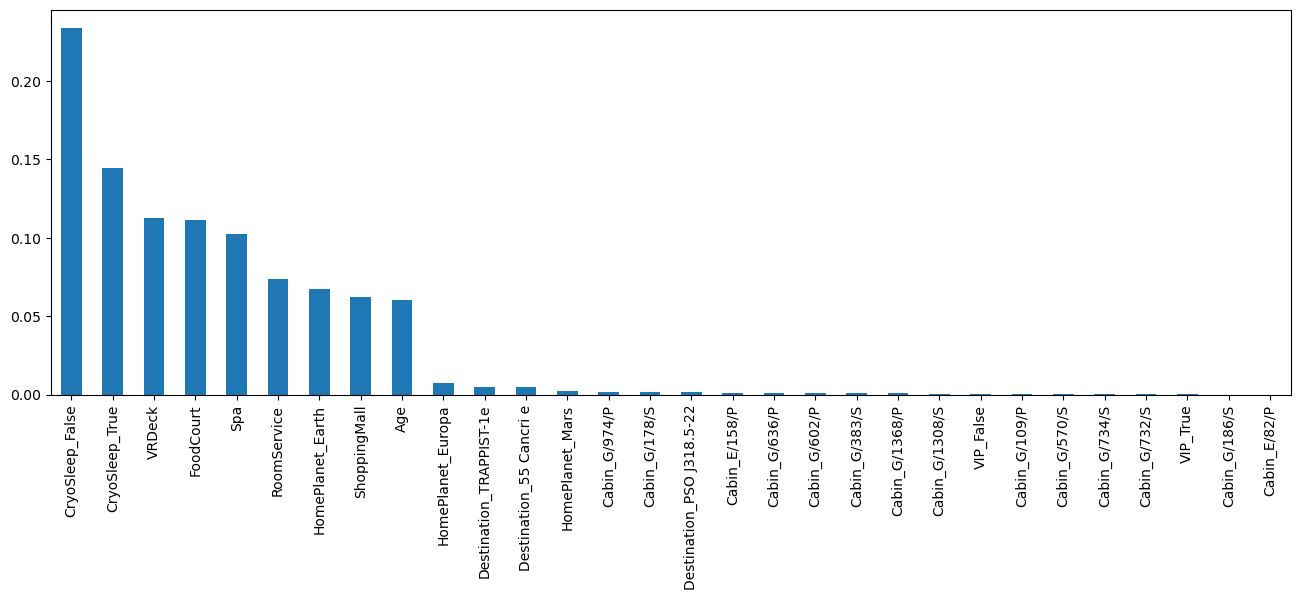

In [35]:
display(imp)
imp.sort_values(ascending=False).plot(kind='bar', figsize=(16,5))

In [41]:
import pickle

In [42]:
# 学習済みモデルを保存
model_comp = model# ここに学習済みモデルを代入
with open('my_model.pickle', 'wb') as f:
    pickle.dump(model_comp, f)

In [44]:
test_df.dtypes
passenger_ids = test_df['PassengerId']  # passenger_id列を取得

In [45]:
test_ohe_columns = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]

In [46]:
test_ohe = pd.get_dummies(test_df, columns = test_ohe_columns)

In [47]:
test_ohe.shape

(3281, 9247)

In [48]:
test_ohe = pd.DataFrame(test_ohe, columns = selected_feature_names)

In [49]:
test_ohe.shape

(3281, 15)

In [50]:
test_ohe.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1


In [59]:
import joblib
# 学習済みモデルを読み込む
loaded_model = joblib.load('my_model.pickle')

# 予測を実行
predictions = loaded_model.predict(test_ohe)


In [61]:
# データフレームを作成
result_df = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': predictions})

# CSVファイルに保存
result_df.to_csv('Titanic.csv', index=False)

In [62]:
comp = pd.read_csv("Titanic.csv")

In [63]:
comp.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [66]:
class_mapping = {1: True, 0: False}
X = comp.iloc[:,:-1]
y = comp.iloc[:,-1]

In [70]:
y = y.map(class_mapping)

In [71]:
y

0        True
1       False
2        True
3        True
4       False
        ...  
3276     True
3277     True
3278     True
3279     True
3280    False
Name: Transported, Length: 3281, dtype: bool

In [74]:
# Xとyを結合
combined_df = pd.concat([X, y], axis=1)

In [75]:
combined_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
3276,9263_01,True
3277,9265_01,True
3278,9266_01,True
3279,9266_02,True


In [76]:
combined_df.to_csv('improve_Titanic.csv', index=False)